In [21]:
from nam.config.default import defaults
from nam.data import FoldedDataset, NAMDataset
from nam.models import NAM, get_num_units
from nam.trainer import LitNAM
from nam.utils import *

In [22]:
import pytorch_lightning as pl
from pytorch_lightning.callbacks.model_checkpoint import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger

from nam.config import defaults
from nam.data import FoldedDataset
from nam.data import NAMDataset
from nam.models import NAM
from nam.models import get_num_units
from nam.trainer import LitNAM
from nam.types import Config
from nam.utils import parse_args
from nam.utils import plot_mean_feature_importance
from nam.utils import plot_nams

import torch


import pandas as pd

In [23]:
config = defaults()
config.activation = "Relu"
config.decay_rate = 0.05

In [24]:
from nam.data.datasets import load_UKload

dataset = load_UKload(config, "Ukload.csv")

dataloaders = dataset.train_dataloaders()

In [25]:
train_loader, val_loader = dataset.train_dl, dataset.val_dl

config.num_epochs=200
config.weight_decay=0

In [26]:
config.decay_rate = 0.0
config.dropout=0.0
config.l2_regularization=0
config.actiavtion="exu"
config.hidden_sizes=[100, 100]
config.output_regularization=0

In [27]:
model = NAM(
  config=config,
  name="Ukload",
  num_inputs=5,
  num_units=1000,
)

In [28]:
from nam.trainer.trainer import Trainer as NAMTrainer

trainer = NAMTrainer(config=config, model=model, dataset=dataset, loss="mae")

trainer.train()

Epoch(0):      | 0/200 [00:00<?, ?it/s]
            TL: 19001046.000 |
            VL: 18214488.000 |
Epoch(0):   MAE: 3434.431:   0%|          | 0/200 [00:00<?, ?it/s]
            TL: 19001046.000 |
            VL: 18214488.000 |
Epoch(1):   MAE: 3434.431:   0%|          | 1/200 [00:00<01:04,  3.10it/s]
            TL: 18812786.000 |
            VL: 17014940.000 |
Epoch(1):   MAE: 3426.069:   0%|          | 1/200 [00:00<01:04,  3.10it/s]
            TL: 18812786.000 |
            VL: 17014940.000 |
Epoch(2):   MAE: 3426.069:   1%|          | 2/200 [00:00<00:53,  3.70it/s]
            TL: 16009687.000 |
            VL: 10630074.000 |
Epoch(2):   MAE: 3143.171:   1%|          | 2/200 [00:00<00:53,  3.70it/s]
            TL: 16009687.000 |
            VL: 10630074.000 |
Epoch(3):   MAE: 3143.171:   2%|▏         | 3/200 [00:00<00:51,  3.82it/s]
            TL: 9833515.000 |
            VL: 6653189.000 |
Epoch(3):   MAE: 2428.510:   2%|▏         | 3/200 [00:01<00:51,  3.82it/s]  
         

In [29]:
metric = trainer.test()
print(metric)

Test Loss: 6765711.50 : 100%|██████████| 200/200 [00:04<00:00, 46.04it/s]

2140.2362467447915


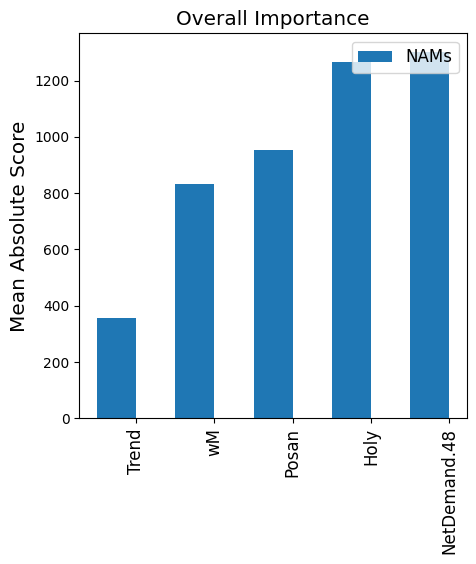

In [30]:
fig = plot_mean_feature_importance(model, dataset)

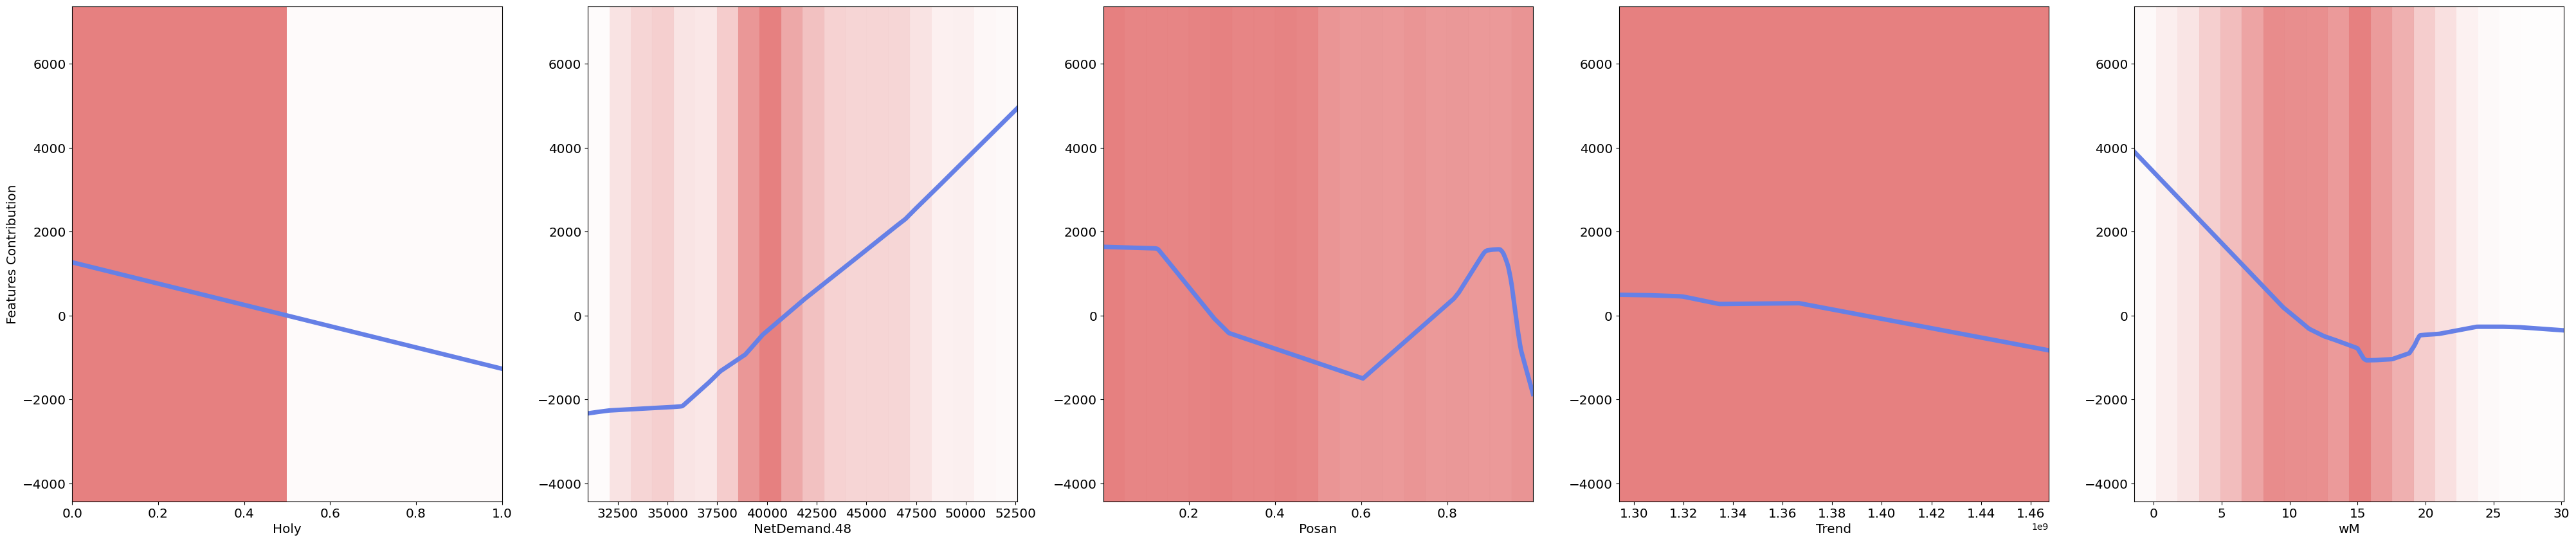

In [31]:
fig = plot_nams(model, dataset, num_cols=5)